# Doubts : 

1.   What is the use of DataLoader?
2.   



# Outline : 



*   Load mnist dataset (done)
*   flatten 2d image to 1d array (done)
*   Normalize images value from [0, 255] to [0, 1] (done)
*   create feature and targets tensor for train and test set.(done)
*   define epoch (done)
*   data loader 
*   visualize one of the images in data set 
*   









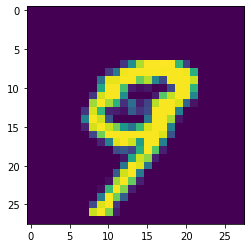

tensor(5, dtype=torch.uint8)
num_epochs :  5000


<ipython-input-40-51ce88fe68c8>:62: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  trainset=np.array(list(zip(X_train,y_train)))
<ipython-input-40-51ce88fe68c8>:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trainset=np.array(list(zip(X_train,y_train)))


TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from random import random

def flatten(X_data):
  flatten_data=[]
  for i in range(len(X_data)):
    sample=X_data[i]
    flatten_row=[]
    for row in sample:
      flatten_row+=list(row)
      pass
    pass
    flatten_data.append(np.array(flatten_row,dtype='float32'))
    pass
  return np.array(flatten_data)
  pass


(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train=X_train[0:100]
y_train=y_train[0:100]

# visualize one of the images in data set
sample_image_mat=X_train[int(random()*len(X_train))]
plt.imshow(sample_image_mat)
plt.show()


X_train=flatten(X_train)
# X_test=flatten(X_test)

scaler = MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)

X_train=torch.tensor(X_train)
# X_test=torch.tensor(X_test)

y_train=torch.tensor(y_train)
# y_test=torch.tensor(y_test)

print(y_train[0])

batch_size = 100
n_iters = 5000

num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

print("num_epochs : ",num_epochs)
trainset=np.array(list(zip(X_train,y_train)))
trainloader = DataLoader(trainset, batch_size=batch_size,shuffle=True)


# dataiter = iter(trainloader)
# for _ in range(len(X_train)-1):
#   input,target=next(dataiter)
#   print(target,input)
#   pass
# print(trainloader)



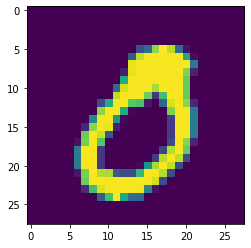

tensor(5, dtype=torch.uint8)
num_epochs :  1000


RuntimeError: ignored

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import TensorDataset,DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from random import random

def flatten(X_data):
    flatten_data=[]
    for i in range(len(X_data)):
        sample=X_data[i]
        flatten_row=[]
        for row in sample:
            flatten_row+=list(row)
        flatten_data.append(np.array(flatten_row,dtype='float32'))
    return np.array(flatten_data)

class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1,hidden_dim2, output_dim):
        super(ANNModel, self).__init__()
        self.sigmoid = nn.Sigmoid()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, output_dim)
        # self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # self.fc3 = nn.Linear(hidden_dim2, output_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        # out = self.fc3(out)
        # out = self.sigmoid(out)
        
        return out

    def predict(self,x):
        
        output=self.forward(x).tolist()
        output_labels=[]
        for elem in output : 
          lbl=elem.index(max(elem))
          output_labels.append(lbl)
        # print(output_labels)
        output_labels=np.array(output_labels)
        # print("label : ",lbl)
        # print(output)
        return output_labels
        pass

(X_train, y_train), (X_test,y_test) = mnist.load_data()

X_train=X_train[0:100]
X_test=X_test[0:100]
y_train=y_train[0:100]
y_test=y_test[0:100]

# visualize one of the images in data set
sample_image_mat=X_train[int(random()*len(X_train))]
plt.imshow(sample_image_mat)
plt.show()

X_train=flatten(X_train)
X_test=flatten(X_test)

scaler = MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)

X_train=torch.tensor(X_train)
X_test=torch.tensor(X_test)
y_train=torch.tensor(y_train)
y_test=torch.tensor(y_test)

print(y_train[0])

batch_size = 10
n_iters = 10000

num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

print("num_epochs : ",num_epochs)
# trainset = [(X_train[i], y_train[i]) for i in range(len(X_train))]
trainset=TensorDataset(X_train,y_train)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

# dataiter = iter(trainloader)

# while True:
#   try:
#     input, target = next(dataiter)
#     print(target)
#   except StopIteration:
#     break

input_dim = X_train.shape[1]
hidden_dim1 = 50
hidden_dim2 = 100
output_dim = 10

model = ANNModel(input_dim, hidden_dim1,hidden_dim2, output_dim)

# criterion = nn.CrossEntropyLoss()
# criterion=tf.keras.losses.CategoricalCrossentropy()
criterion=nn.MSELoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):
    inputs = Variable(images.view(-1, input_dim))
    labels = Variable(labels)
    optimizer.zero_grad()
    outputs=model(inputs)
    # outputs = torch.tensor(model(inputs),dtype=torch.float)
    # labels = torch.tensor(labels,dtype=torch.float)
    # print(outputs.shape,labels.shape)
    # print(outputs,labels)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    # if (i+1) % 10 == 0:
    #     print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
    #           % (epoch+1, num_epochs, i+1, len(trainset)//batch_size, loss.item()))
    pass
  pass


# print(model.forward())
sample=torch.tensor(flatten([sample_image_mat]))
print(model.predict(sample))
y_pred=torch.tensor(model.predict(X_test))
# print(y_pred,y_test)
print(accuracy_score(y_test,y_pred))